Artur Eremov B20-RO-01 a.eremov@innopolis.university

Link to github(The same work but there is PodvalMap.png file): https://github.com/ipipos56/SensorsAndSensingS23/tree/main/Homework4

In [ ]:
#!pip install numpy matplotlib scipy opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Home assignment 4(a)

### Generate noisy 1D data:

Let's generate a noisy signal with 200 points which placed along one "line"

After we will use Hough Transform to find line and draw the result

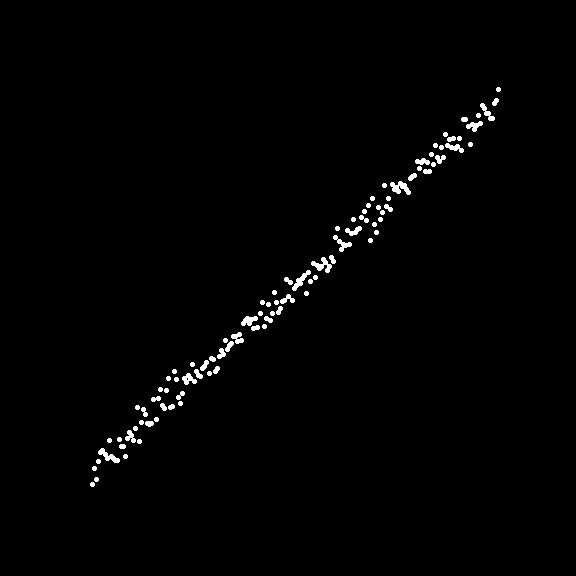

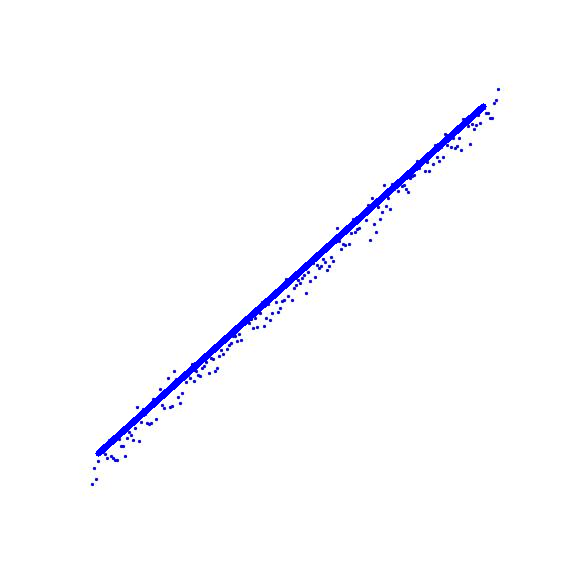

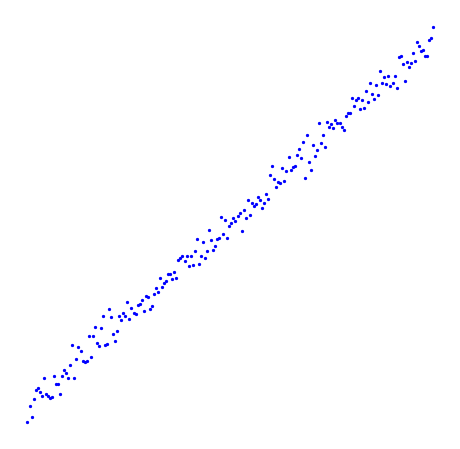

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Generate 2D dataset with a noisy line
n = 200
x = np.linspace(0, 100, n)
y = 2 * x + 1 + np.random.normal(0, 5, n)
data = np.column_stack((x, y))

# Visualize results in the raw data
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=5, c='blue')
plt.axis('off')
plt.savefig('points.jpg')
img = cv2.imread('points.jpg')

# Convert data to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

if gray is None or gray.size == 0:
  print("error")



# Apply some preprocessing to improve edge detection
gray = cv2.GaussianBlur(gray, (5, 5), 0)
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
gray = cv2.bitwise_not(gray)
cv2_imshow(gray)
lines_hough_lines_p = cv2.HoughLinesP(gray,1,np.pi/180,100,minLineLength=170,maxLineGap=60)
lines_hough_lines = cv2.HoughLines(gray, 1, np.pi / 180, 100, None, 170, 60)

line = lines_hough_lines_p[-1]
for x1,y1,x2,y2 in line:
  cv2.line(img,(x1,y1),(x2,y2),(255,0,0),5)
cv2_imshow(img)

# Visualize results in Hough space
# plt.figure(figsize=(8, 8))
# plt.imshow(gray, cmap='gray')
# for i in range(len(lines_hough_lines)):
#     rho = lines_hough_lines[i][0][0]
#     theta = lines_hough_lines[i][0][1]
#     plt.plot(theta * 180 / np.pi, rho, 'r+', markersize=10)
# plt.title('Hough space with detected line')
# plt.xlabel('Theta (degrees)')
# plt.ylabel('Rho')
# plt.show()

#Home assignment 4(b)

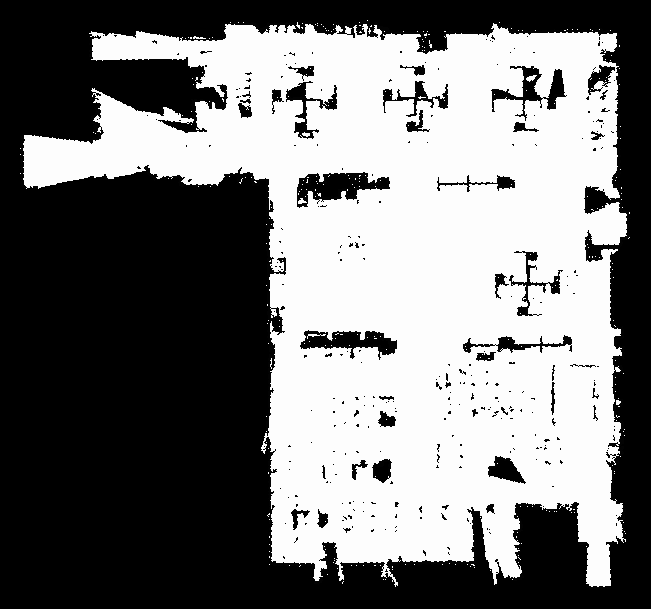

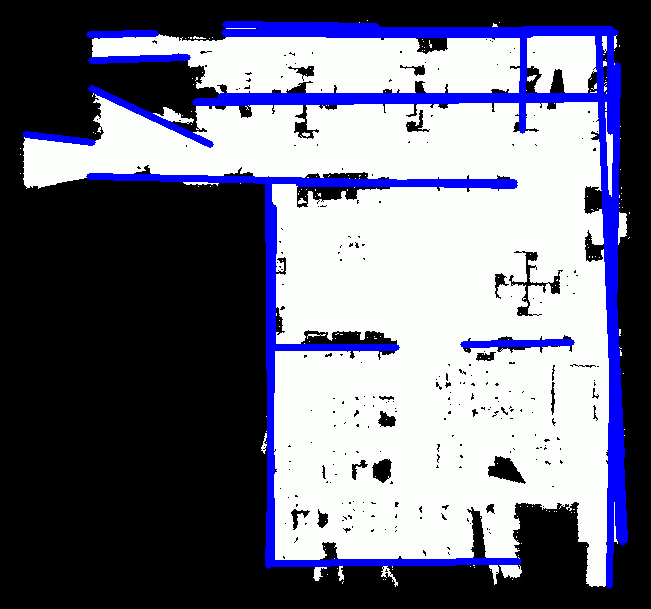

In [69]:
img = cv2.imread('PodvalMap.png')

# Convert data to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

edges = cv2.Canny(gray,100,200)
# cv2_imshow(edges)
lines_hough_lines_p = cv2.HoughLinesP(edges,1,np.pi/3000,80,minLineLength=30,maxLineGap=50)

for line in lines_hough_lines_p:
  for x1,y1,x2,y2 in line:
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),5)
cv2_imshow(img)
